In [ ]:
from google.colab import drive
drive .mount('/content/drive/') 

Mounted at /content/drive/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.layers import Input,Dense
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.applications.densenet import preprocess_input
from keras.applications.densenet import DenseNet
from keras.applications.densenet import DenseNet121
from keras.preprocessing import sequence
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import itertools 
from keras.models import Model    
from keras.layers import *
from keras.layers import LSTM, Dense
from keras.applications.xception import Xception
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2 

import time
import numpy as np
from keras.layers import Embedding
from keras.constraints import *
from keras.optimizers import *
from keras.utils import np_utils
from keras import Model
from keras.layers import *
from keras.datasets import imdb
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from keras import backend as K
import tensorflow as tf
from glob import glob
import numpy as np
import PIL.Image
import PIL
import cv2
import os

In [ ]:
pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 4.2 MB/s 


In [ ]:
img=image.load_img("/content/drive/MyDrive/Datatset/Lung Cancer/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png")

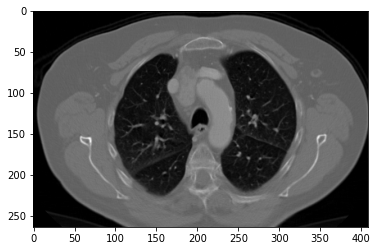

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/Datatset/Lung Cancer/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png")

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
cv2.imread("/content/drive/MyDrive/Datatset/Lung Cancer/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png").shape

(264, 409, 3)

In [ ]:
Train="/content/drive/MyDrive/Datatset/Lung Cancer/train"
Test="/content/drive/MyDrive/Datatset/Lung Cancer/valid"
Valid="/content/drive/MyDrive/Datatset/Lung Cancer/test"

In [ ]:
train= ImageDataGenerator(rescale=1/255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect')

valid=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset=train.flow_from_directory(Train, 
                                                        target_size=(224,224),
                                                         batch_size=16,
                                                        class_mode='categorical')

valid_dataset=valid.flow_from_directory(Valid, 
                                                        target_size=(224,224),
                                                         batch_size=16,
                                                        class_mode='categorical')

test_dataset=test.flow_from_directory(Test, 
                                                        target_size=(224,224),
                                                         batch_size=16,
                                                        class_mode='categorical')

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
train_dataset.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
model=Sequential()
model.add(InceptionResNetV2(include_top=False,
                  pooling='avg',
                   weights='imagenet'))

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
model.add(Dense(4,activation='softmax'))

In [ ]:
model.layers

In [ ]:
model.layers[0].layers

In [ ]:
model.layers[0].trainable=False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 dense (Dense)               (None, 4)                 4100      
                                                                 
Total params: 7,041,604
Trainable params: 4,100
Non-trainable params: 7,037,504
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="Adam",metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
history_densenet=model.fit_generator(train_dataset, epochs=50, steps_per_epoch=39, validation_data=(valid_dataset),validation_steps=19)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
39/39 [==============================] - 16s 410ms/step - loss: 0.7587 - binary_accuracy: 0.8487 - precision: 0.7895 - recall: 0.5383 - val_loss: 0.7366 - val_binary_accuracy: 0.8446 - val_precision: 0.8324 - val_recall: 0.4737
Epoch 2/50
39/39 [==============================] - 16s 404ms/step - loss: 0.7136 - binary_accuracy: 0.8499 - precision: 0.7765 - recall: 0.5612 - val_loss: 0.7535 - val_binary_accuracy: 0.8372 - val_precision: 0.7880 - val_recall: 0.4770
Epoch 3/50
39/39 [==============================] - 16s 410ms/step - loss: 0.7216 - binary_accuracy: 0.8515 - precision: 0.7773 - recall: 0.5693 - val_loss: 0.8859 - val_binary_accuracy: 0.8207 - val_precision: 0.7108 - val_recall: 0.4770
Epoch 4/50
39/39 [==============================] - 16s 409ms/step - loss: 0.7190 - binary_accuracy: 0.8528 - precision: 0.7739 - recall: 0.5808 - val_loss: 0.7955 - val_binary_accuracy: 0.8207 - val_precision: 0.6748 - val_recall: 0.5461
Epoch 5/50
39/39 [==========================

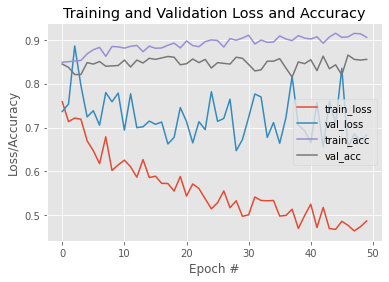

In [ ]:
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history_densenet.history["loss"], label="train_loss")
plt.plot(N, history_densenet.history["val_loss"], label="val_loss")
plt.plot(N, history_densenet.history["binary_accuracy"], label="train_acc")
plt.plot(N, history_densenet.history["val_binary_accuracy"], label="val_acc")
plt.title("Training and Validation Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")


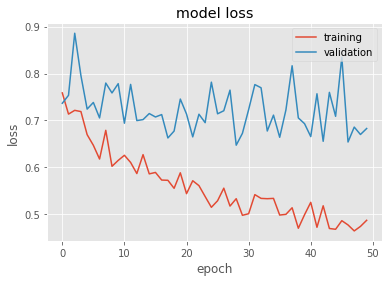

In [ ]:
plt.plot(history_densenet.history['loss'])
plt.plot(history_densenet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

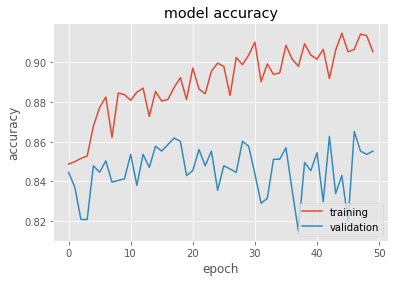

In [ ]:
plt.plot(history_densenet.history['binary_accuracy'])
plt.plot(history_densenet.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [ ]:
valid_score = model.evaluate_generator(valid_dataset, steps=2, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(valid_score[1] * 100)) 
print("[INFO] Loss: ",valid_score[0])
print("[INFO] Precision: ",valid_score[2])
print("[INFO] Recall: ",valid_score[3])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


2/2 [==============================] - 1s 165ms/step - loss: 0.6247 - binary_accuracy: 0.8594 - precision: 0.8182 - recall: 0.5625
[INFO] accuracy: 85.94%
[INFO] Loss:  0.6246774196624756
[INFO] Precision:  0.8181818127632141
[INFO] Recall:  0.5625


In [ ]:
train_score = model.evaluate_generator(train_dataset,steps=2, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(train_score[1] * 100)) 

print("[INFO] Loss: ",train_score[0])
print("[INFO] Precision: ",train_score[2])
print("[INFO] Recall: ",train_score[3])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


2/2 [==============================] - 1s 570ms/step - loss: 0.4537 - binary_accuracy: 0.9219 - precision: 0.9231 - recall: 0.7500
[INFO] accuracy: 92.19%
[INFO] Loss:  0.45365002751350403
[INFO] Precision:  0.9230769276618958
[INFO] Recall:  0.75


In [ ]:
test_score = model.evaluate_generator(test_dataset,steps=2, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])
print("[INFO] Precision: ",test_score[2])
print("[INFO] Recall: ",test_score[3])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


2/2 [==============================] - 1s 160ms/step - loss: 0.6010 - binary_accuracy: 0.8750 - precision: 0.7857 - recall: 0.6875
[INFO] accuracy: 87.50%
[INFO] Loss:  0.6010134816169739
[INFO] Precision:  0.7857142686843872
[INFO] Recall:  0.6875


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
test_generator = test_datagen.flow_from_directory(
        Test,
        target_size=(224, 224),
        batch_size=16,
        class_mode='binary',
        shuffle=False) 

Found 72 images belonging to 4 classes.


In [ ]:
predictions = model.predict(test_generator, steps=5, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

5/5 [==============================] - 1s 148ms/step


In [ ]:
import pandas as pd
import seaborn as sn
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    recall=recall_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1Score : {}".format(f1Score))
   
    cm=confusion_matrix(y_true, y_pred)
   
    plt.figure(figsize = (7,5))
    sn.heatmap( cm, annot=True,cmap="OrRd")
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    print(cm)
    return accuracy, precision,  recall, f1Score

Accuracy  : 0.7638888888888888
Precision : 0.7751225490196079
Recall : 0.7638888888888888
f1Score : 0.7637677527151211
[[17  3  0  3]
 [ 4 13  0  4]
 [ 1  0 12  0]
 [ 1  1  0 13]]


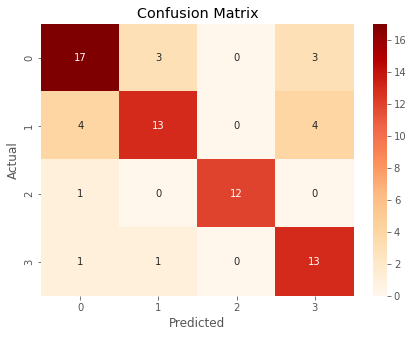

In [ ]:
testAcc,testPrec,testrecall, testFScore = my_metrics(true_classes, yPredictions)

In [ ]:
test_path='/content/drive/MyDrive/Datatset/Lung Cancer/test'

In [ ]:
for i in os.listdir(test_path):
  img=image.load_img(test_path+'//'+i,target_size=(224,224))
  plt.imshow(img)
  plt.show()

  X=image.img_to_array(img)
  X=np.expand_dims(X, axis=0)
  images=np.vstack([X])
  array=model.predict(images)
  result = array[0]
  #print(result)
  answer = np.argmax(result)
  if answer == 0:
    print("Predicted: Negative")
  else :
    print("Predicted: Positive")
 


IsADirectoryError: ignored

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap="OrRd"):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="left",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')
  

    plt.xlabel('Predicted label')

In [ ]:
target_names = []

for key in train_dataset.class_indices:

    target_names.append(key)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Confusion matrix, without normalization


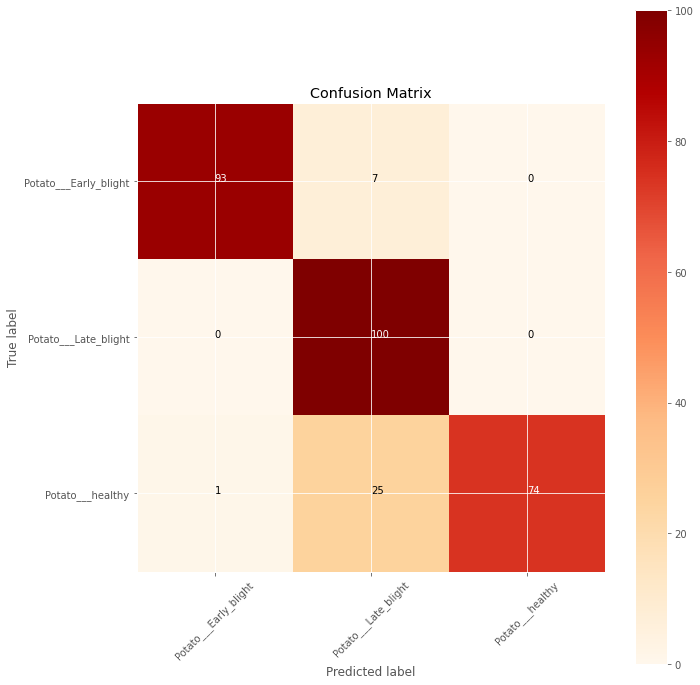

In [ ]:
Y_pred = model.predict_generator(test_generator)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)

plot_confusion_matrix(cm, target_names, normalize    = False,title='Confusion Matrix')

In [ ]:
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
                       precision    recall  f1-score   support

Potato___Early_blight       0.99      0.93      0.96       100
 Potato___Late_blight       0.76      1.00      0.86       100
     Potato___healthy       1.00      0.74      0.85       100

             accuracy                           0.89       300
            macro avg       0.92      0.89      0.89       300
         weighted avg       0.92      0.89      0.89       300

